In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
%matplotlib inline

In [7]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)

In [8]:
#A. Standardize the d-dimensional dataset

In [9]:
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash','Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids',
       'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue','OD280/OD315 of diluted wines','Proline']

In [10]:
print('Class labels', np.unique(df_wine['Class label']))

('Class labels', array([1, 2, 3]))


In [11]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [12]:
#Display full set of records
#df_wine

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045


In [13]:
# Split data into training set (70%) and test set (30%) sets
# Standardize to unit variance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = \
     train_test_split(X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [14]:
#Construct covariance matrix which is symmetric with d×d-dimension where d is dataset dimension
covariant_matrix = np.cov(X_train_std.T)

covariant_matrix[0::5]

array([[ 1.00813008,  0.08797701,  0.23066952, -0.32868099,  0.2141631 ,
         0.35576761,  0.2991246 , -0.16913744,  0.09649074,  0.56962271,
        -0.04781543,  0.07403492,  0.63277882],
       [ 0.35576761, -0.30124242,  0.12235533, -0.37018442,  0.16513295,
         1.00813008,  0.88119961, -0.45396901,  0.6196806 , -0.06935051,
         0.45718802,  0.72214462,  0.56326772],
       [-0.04781543, -0.54992807, -0.10928021, -0.25313262,  0.05792599,
         0.45718802,  0.58331869, -0.3178224 ,  0.32282167, -0.52395358,
         1.00813008,  0.60022569,  0.2452794 ]])

In [15]:
#C. Decompose the covariance matrix into its eigenvectors and eigenvalues

eigen_values, eigen_vectors = np.linalg.eig(covariant_matrix)

In [16]:
eigen_values, eigen_vectors[::5]

(array([ 4.8923083 ,  2.46635032,  1.42809973,  1.01233462,  0.84906459,
         0.60181514,  0.52251546,  0.08414846,  0.33051429,  0.29595018,
         0.16831254,  0.21432212,  0.2399553 ]),
 array([[  1.46698114e-01,   5.04170789e-01,  -1.17235150e-01,
           2.06254611e-01,  -1.87815947e-01,  -1.48851318e-01,
          -1.79263662e-01,  -5.54687162e-02,  -4.03054922e-01,
          -4.17197583e-01,   2.75660860e-01,   4.03567189e-01,
           4.13320786e-04],
        [  3.89344551e-01,   9.36399132e-02,   1.80804417e-01,
           1.93179478e-01,   1.40645426e-01,   1.22248798e-02,
           5.31455344e-02,  -4.21265116e-01,   1.35111456e-01,
          -2.80985650e-01,   2.83897644e-01,  -6.18600153e-01,
           9.45645138e-02],
        [  3.00325353e-01,  -2.79243218e-01,   9.32387182e-02,
           2.41740256e-02,  -3.72610811e-01,   2.16515349e-01,
          -3.84654748e-01,  -1.05383688e-01,  -5.17259438e-01,
           1.97814118e-01,  -1.98844532e-01,  -2.0045638

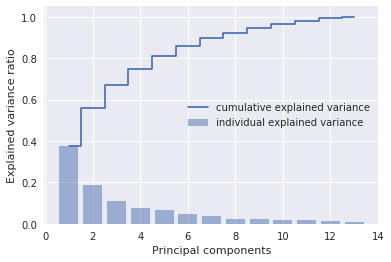

In [18]:
#Calculate the cumulative sum of explained variances

tot = sum(eigen_values)
var_exp = [(i / tot) for i in sorted(eigen_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

bar(range(1,14), var_exp, alpha=0.5, align='center', label='individual explained variance')
step(range(1,14), cum_var_exp, where='mid',label='cumulative explained variance')
ylabel('Explained variance ratio')
xlabel('Principal components')
legend(loc='best')
show()

In [19]:
#sort the eigen-pairs by descending order of the eigenvalues
#construct a projection matrix from the selected eigenvectors
#transform the data onto the lower-dimensional subspace
eigen_pairs = \
[(np.abs(eigen_values[i]),eigen_vectors[:,i]) for i in range(len(eigen_values))]
eigen_pairs.sort(reverse=True)

In [20]:
eigen_pairs[:5]

[(4.8923083032737438,
  array([ 0.14669811, -0.24224554, -0.02993442, -0.25519002,  0.12079772,
          0.38934455,  0.42326486, -0.30634956,  0.30572219, -0.09869191,
          0.30032535,  0.36821154,  0.29259713])),
 (2.466350315759231,
  array([ 0.50417079,  0.24216889,  0.28698484, -0.06468718,  0.22995385,
          0.09363991,  0.01088622,  0.01870216,  0.03040352,  0.54527081,
         -0.27924322, -0.174365  ,  0.36315461])),
 (1.4280997275048446,
  array([-0.11723515,  0.14994658,  0.65639439,  0.58428234,  0.08226275,
          0.18080442,  0.14295933,  0.17223475,  0.1583621 , -0.14242171,
          0.09323872,  0.19607741, -0.09731711])),
 (1.0123346209044954,
  array([ 0.20625461,  0.1304893 ,  0.01515363, -0.09042209, -0.83912835,
          0.19317948,  0.14045955,  0.33733262, -0.1147529 ,  0.07878571,
          0.02417403,  0.18402864,  0.05676778])),
 (0.8490645933450256,
  array([-0.18781595,  0.56863978, -0.29920943, -0.04124995, -0.02719713,
          0.14064543,

In [23]:
w= np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
w.shape



(13, 2)

In [24]:
# display new transformed projection matrix
w

array([[ 0.14669811,  0.50417079],
       [-0.24224554,  0.24216889],
       [-0.02993442,  0.28698484],
       [-0.25519002, -0.06468718],
       [ 0.12079772,  0.22995385],
       [ 0.38934455,  0.09363991],
       [ 0.42326486,  0.01088622],
       [-0.30634956,  0.01870216],
       [ 0.30572219,  0.03040352],
       [-0.09869191,  0.54527081],
       [ 0.30032535, -0.27924322],
       [ 0.36821154, -0.174365  ],
       [ 0.29259713,  0.36315461]])

In [25]:
# Transform a sample x (represented as 1×13 row vector) onto the PCA subspace obtaining x′ which is a 2-D sample vector


X_train_std[0]

array([ 0.91083058, -0.46259897, -0.01142613, -0.82067872,  0.06241693,
        0.58820446,  0.93565436, -0.7619138 ,  0.13007174, -0.51238741,
        0.65706596,  1.94354495,  0.93700997])

In [26]:
X_train_std[0].dot(w)

array([ 2.59891628,  0.00484089])

In [27]:
#Transform training dataset to two principal components by calculating matrix dot product
X_train_pca = X_train_std.dot(w)
X_train_std.shape, w.shape, X_train_pca.shape

((124, 13), (13, 2), (124, 2))

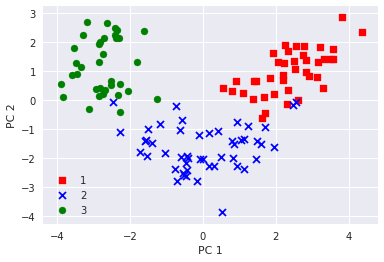

In [28]:
#to visualize the transformed Wine training set, now stored as an 
#124×2
#3124×2 matrix, in a two-dimensonal scatterplot

colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    scatter(X_train_pca[y_train==l, 0], X_train_pca[y_train==l, 1],
            c=c, label=l, marker=m)
xlabel('PC 1')
ylabel('PC 2')
legend(loc='lower left')
show()

In [29]:
#We can see from the plot that the data is more spread along the x-axis which is the first principal component than the 
#y-axis which is the second principal component.

#Though this is consistent with the explained variance ratio plot that is created above, need to intuitively see that 
#a linear classifier will likely be able to separate the classes well.

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    xlim(xx1.min(), xx1.max())
    ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx),
                marker=markers[idx], label=cl)

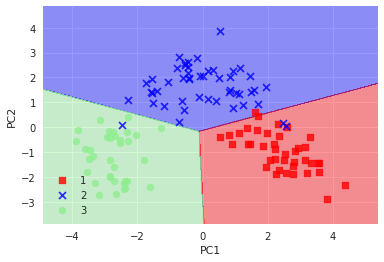

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
xlabel('PC1')
ylabel('PC2')
legend(loc='lower left')
show()

In [33]:
#From the picture above, we can see the decision regions for the training model reduced to the two principal component axes.

from sklearn.base import clone
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [34]:
class SBS():
    def __init__(self, estimator, k_features,
        scoring=accuracy_score,
        test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
        
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
        random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train,
        X_test, y_test, self.indices_)
        self.scores_ = [score]
        while dim > self.k_features:
            scores = []
            subsets = []
            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train,
                X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        return self
    
        def transform(self, X):
            return X[:, self.indices_]
        
        def _calc_score(self, X_train, y_train,
                        X_test, y_test, indices):
            self.estimator.fit(X_train[:, indices], y_train)
            y_pred = self.estimator.predict(X_test[:, indices])
            score = self.s
            return score

In [35]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [36]:
df_wine.iloc[:, 0].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [37]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.3, random_state=0)

In [38]:
len(X_test), len(X_train)

(54, 124)

In [39]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [40]:
X_train_norm[0]

array([ 0.72043011,  0.20378151,  0.53763441,  0.30927835,  0.33695652,
        0.54316547,  0.73700306,  0.25      ,  0.40189873,  0.24068768,
        0.48717949,  1.        ,  0.5854251 ])

In [41]:
X_test_norm[0]

array([ 0.72849462,  0.16386555,  0.47849462,  0.29896907,  0.52173913,
        0.53956835,  0.74311927,  0.13461538,  0.37974684,  0.4364852 ,
        0.32478632,  0.70695971,  0.60566802])

In [42]:
X_train_norm[0]

array([ 0.72043011,  0.20378151,  0.53763441,  0.30927835,  0.33695652,
        0.54316547,  0.73700306,  0.25      ,  0.40189873,  0.24068768,
        0.48717949,  1.        ,  0.5854251 ])

In [43]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [44]:
X_train_std[0]

array([ 0.91083058, -0.46259897, -0.01142613, -0.82067872,  0.06241693,
        0.58820446,  0.93565436, -0.7619138 ,  0.13007174, -0.51238741,
        0.65706596,  1.94354495,  0.93700997])

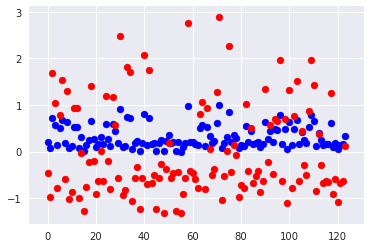

In [45]:
xx = np.arange(len(X_train_std))
yy1 = X_train_norm[:,1]
yy2 = X_train_std[:,1]
scatter(xx, yy1, color='b')
scatter(xx, yy2, color='r')

In [46]:
#Common ways to reduce overfitting is by regularization and dimensionality reduction via feature selection

from sklearn.linear_model import LogisticRegression

LogisticRegression(penalty='l1')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
logi_regr = LogisticRegression(penalty='l1', C=0.1)
logi_regr.fit(X_train_std, y_train)
print('Training accuracy:', logi_regr.score(X_train_std, y_train))
print('Test accuracy:', logi_regr.score(X_test_std, y_test))

('Training accuracy:', 0.9838709677419355)
('Test accuracy:', 0.98148148148148151)


In [48]:
logi_regr.intercept_

array([-0.38381159, -0.15814421, -0.70039109])

In [49]:
logi_regr.coef_

array([[ 0.28000218,  0.        ,  0.        , -0.02798222,  0.        ,
         0.        ,  0.70993612,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.23676865],
       [-0.64380903, -0.06896934, -0.05715658,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.9271919 ,
         0.05972072,  0.        , -0.37095225],
       [ 0.        ,  0.06146515,  0.        ,  0.        ,  0.        ,
         0.        , -0.63650724,  0.        ,  0.        ,  0.49829252,
        -0.3581679 , -0.57078039,  0.        ]])

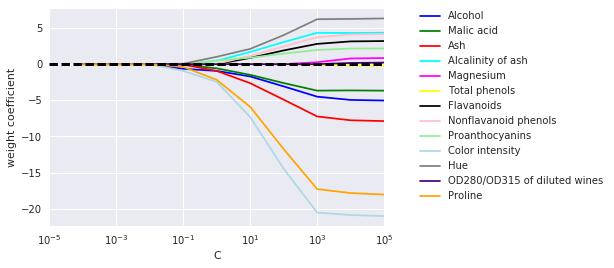

In [50]:
#Plotting the regularization path, which is the weight coeffcients of the different features for different regularization strengths

fig = figure()
ax = subplot(111)
colors = ['blue', 'green', 'red', 'cyan',
'magenta', 'yellow', 'black',
'pink', 'lightgreen', 'lightblue',
'gray', 'indigo', 'orange']
weights, params = [], []
for c in np.arange(-4, 6):
    lr = LogisticRegression(penalty='l1',
            C=10**float(c), random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**float(c))
weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plot(params, weights[:, column],
        label=df_wine.columns[column+1], color=color)
axhline(0, color='black', linestyle='--', linewidth=3)
xlim([10**(-5), 10**5])
ylabel('weight coefficient')
xlabel('C')
xscale('log')
legend(loc='upper left')
legend(loc='upper center',
bbox_to_anchor=(1.38, 1.03),
ncol=1, fancybox=True)
show()



In [51]:
from sklearn.base import clone
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [52]:
class SBS():
    def __init__(self, estimator, k_features,
        scoring=accuracy_score,
        test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
        
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
        random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train,
        X_test, y_test, self.indices_)
        self.scores_ = [score]
        while dim > self.k_features:
            scores = []
            subsets = []
            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train,
                X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        return self
    
    def transform(self, X):
        return X[:, self.indices_]
        
    def _calc_score(self, X_train, y_train,
                        X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

<__main__.SBS instance at 0x7f695f645c68>

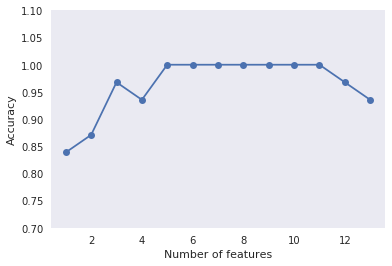

In [54]:
k_feat = [len(k) for k in sbs.subsets_]
plot(k_feat, sbs.scores_, marker='o')
ylim([0.7, 1.1])
ylabel('Accuracy')
xlabel('Number of features')
grid()
show()

In [55]:
k5 = list(sbs.subsets_[8])
print(df_wine.columns[1:][k5])

Index([u'Alcohol', u'Malic acid', u'Alcalinity of ash', u'Hue', u'Proline'], dtype='object')


In [56]:
sbs.subsets_

[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
 (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12),
 (0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12),
 (0, 1, 2, 3, 6, 7, 8, 9, 10, 12),
 (0, 1, 2, 3, 6, 7, 8, 10, 12),
 (0, 1, 2, 3, 6, 8, 10, 12),
 (0, 1, 3, 6, 8, 10, 12),
 (0, 1, 3, 6, 10, 12),
 (0, 1, 3, 10, 12),
 (0, 1, 10, 12),
 (0, 1, 10),
 (0, 10),
 (0,)]

In [57]:
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

('Training accuracy:', 0.9838709677419355)
('Test accuracy:', 0.94444444444444442)


In [58]:
knn.fit(X_train_std[:, k5], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k5], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k5], y_test))

('Training accuracy:', 0.95967741935483875)
('Test accuracy:', 0.96296296296296291)


In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
df_wine.columns[1:]

Index([u'Alcohol', u'Malic acid', u'Ash', u'Alcalinity of ash', u'Magnesium',
       u'Total phenols', u'Flavanoids', u'Nonflavanoid phenols',
       u'Proanthocyanins', u'Color intensity', u'Hue',
       u'OD280/OD315 of diluted wines', u'Proline'],
      dtype='object')

In [61]:
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[f],importances[indices[f]]))

 1) Alcohol                        0.182483
 2) Malic acid                     0.158610
 3) Ash                            0.150948
 4) Alcalinity of ash              0.131987
 5) Magnesium                      0.106589
 6) Total phenols                  0.078243
 7) Flavanoids                     0.060718
 8) Nonflavanoid phenols           0.032033
 9) Proanthocyanins                0.025400
10) Color intensity                0.022351
11) Hue                            0.022078
12) OD280/OD315 of diluted wines   0.014645
13) Proline                        0.013916


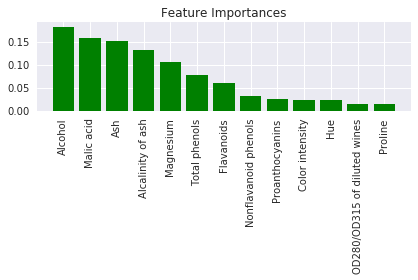

In [62]:
title('Feature Importances')
bar(range(X_train.shape[1]), importances[indices], 
                     color='green', align='center')
xticks(range(X_train.shape[1]),
feat_labels, rotation=90)
xlim([-1, X_train.shape[1]])
tight_layout()
show()